In [1]:
import requests
import pandas as pd
import datetime as dt
import time
import numpy as np
import pickle
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
def getDFs_minute(names):
    for company in names:
        start = int(dt.datetime(2019,11,13).timestamp())
        end = int(dt.datetime(2019,11,20).timestamp())
        url = f'https://query1.finance.yahoo.com/v8/finance/chart/{company}?symbol={company}&period1={start}&period2={end}&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com'
        print(url)
        resp = requests.get(url)
        data = resp.json()
        open1 = data['chart']['result'][0]['indicators']['quote'][0]['open']
        high = data['chart']['result'][0]['indicators']['quote'][0]['high']
        low = data['chart']['result'][0]['indicators']['quote'][0]['low']
        close = data['chart']['result'][0]['indicators']['quote'][0]['close']
        volume = data['chart']['result'][0]['indicators']['quote'][0]['volume']
        timestamp = data['chart']['result'][0]['timestamp']
        date = [dt.datetime.fromtimestamp(i) for i in timestamp]
        df = pd.DataFrame({'date':date,
                           'open':open1,
                           'high':high,
                           'low':low,
                           'close':close,
                           'volume':volume,
                           'timestamp':timestamp})
        dum = '.'
        df = df.round({'open':2,'high':2,'low':2,'close':2})
        df.sort_index(inplace=True)
        df['dates'] = df['date'].dt.date
        df.set_index('date',inplace=True)
        n = np.unique(df['dates'].values)
        q_df = pd.DataFrame()
        for day in n:
            temp_df = df.where(day == df['dates']).dropna()
            a = np.linspace(0.001,(len(temp_df))/1000,num=len(temp_df))
            temp_df['min_col'] = a
            temp_df['close per'] = preprocessing.scale(temp_df['close'].values)
            q_df = q_df.append(temp_df)
        #df.to_pickle(f'./MinuteDataFromYahooCompanies/{company.split(dum)[0]}.pk')
        name=f'./MinuteDataFromYahooCompanies/{company.split(dum)[0]}.pk'
        with open(name,'wb') as f:
            pickle.dump((q_df,n),f)
        print(f'{company} complete')


def getDFs_day(names,pk=False,dropna=True):
    for company in names:
        start = int(dt.datetime(2003,11,1).timestamp())
        end = int(dt.datetime(2019,12,30).timestamp())
        url = f'https://query1.finance.yahoo.com/v8/finance/chart/{company}?symbol={company}&period1={start}&period2={end}&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com'
        print(url)
        resp = requests.get(url)
        data = resp.json()
        open1 = data['chart']['result'][0]['indicators']['quote'][0]['open']
        high = data['chart']['result'][0]['indicators']['quote'][0]['high']
        low = data['chart']['result'][0]['indicators']['quote'][0]['low']
        close = data['chart']['result'][0]['indicators']['quote'][0]['close']
        volume = data['chart']['result'][0]['indicators']['quote'][0]['volume']
        timestamp = data['chart']['result'][0]['timestamp']
        date = [dt.datetime.fromtimestamp(i) for i in timestamp]
        df = pd.DataFrame({'date':date,
                           'open':open1,
                           'high':high,
                           'low':low,
                           'close':close,
                           'volume':volume,
                           'timestamp':timestamp})
        dum = '.'
        df = df.round({'open':2,'high':2,'low':2,'close':2})
        df.sort_index(inplace=True)
        df['dates'] = df['date'].dt.date
        df.drop(['date'],1,inplace=True)
        df.dropna(inplace=dropna)
        #df.to_pickle(f'./MinuteDataFromYahooCompanies/{company.split(dum)[0]}.pk')
        if pk:
            name=f'./DayValues/{company.split(dum)[0]}_{company.split(dum)[1]}.pk'
            with open(name,'wb') as f:
                pickle.dump(df,f)
        else:
            name=f'./DayValues/{company.split(dum)[0]}_{company.split(dum)[1]}.csv'
            df.to_csv(name)
        print(f'{company} complete')



def getDataMin(names):
    for company in names:
        st_time = dt.datetime(2019,11,14)
        end_time = dt.datetime(2019,12,12)
        mid1 = st_time
        mid2 = mid1 + dt.timedelta(days=7)
        if mid2 > end_time:
            mid2=end_time
        q_df = pd.DataFrame()
        dum = '.'
        n = []
        while mid1 < end_time:
            mid1_stamp = int(mid1.timestamp())
            mid2_stamp = int(mid2.timestamp())
            url = f'https://query1.finance.yahoo.com/v8/finance/chart/{company}?symbol={company}&period1={mid1_stamp}&period2={mid2_stamp}&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com'
            print(url)
            resp = requests.get(url)
            data = resp.json()
            open1 = data['chart']['result'][0]['indicators']['quote'][0]['open']
            high = data['chart']['result'][0]['indicators']['quote'][0]['high']
            low = data['chart']['result'][0]['indicators']['quote'][0]['low']
            close = data['chart']['result'][0]['indicators']['quote'][0]['close']
            volume = data['chart']['result'][0]['indicators']['quote'][0]['volume']
            timestamp = data['chart']['result'][0]['timestamp']
            date = [dt.datetime.fromtimestamp(i) for i in timestamp]
            df = pd.DataFrame({'date':date,
                               'open':open1,
                               'high':high,
                               'low':low,
                               'close':close,
                               'volume':volume,
                               'timestamp':timestamp})
            df = df.round({'open':2,'high':2,'low':2,'close':2})
            df.sort_index(inplace=True)
            df['dates'] = df['date'].dt.date
            for i in np.unique(df['dates'].values):
                n.append(i)
            q_df = q_df.append(df)
            mid1 += dt.timedelta(days=7)
            mid2 += dt.timedelta(days=7)
            if mid2 > end_time:
                mid2=end_time
        q_df.set_index('date',inplace=True)
        q_df.sort_index(inplace=True)
        #q_df.to_pickle(f'./MinuteDataFromYahooCompanies/{company.split(dum)[0]}.pk')
        name=f'./MinuteDataFromYahooCompanies/{company.split(dum)[0]}.pk'
        with open(name,'wb') as f:
            pickle.dump((q_df,n),f)
        print(f'{company} complete')

In [3]:
all = ["INFY.NS","INFY.BO","SBIN.BO","SBIN.NS","PIDILITIND.BO","PIDILITIND.NS","GAIL.BO","GAIL.NS","TATAMOTORS.NS","TATAMOTORS.BO","BERGEPAINT.BO","BERGEPAINT.NS","GRASIM.BO","GRASIM.NS","INFRATEL.BO","INFRATEL.NS","NAUKRI.NS","NAUKRI.BO","ADANITRANS.NS","PNB.BO","ADANITRANS.BO","PNB.NS","PAGEIND.BO","PAGEIND.NS","GLAXO.NS","GLAXO.BO","ZEEL.BO","ZEEL.NS","IDFCFIRSTB.NS","LICHSGFIN.BO","LICHSGFIN.NS","TATAGLOBAL.NS","TATAGLOBAL.BO","PFIZER.NS","PFIZER.BO","OBEROIRLTY.BO","OBEROIRLTY.NS","YESBANK.BO","YESBANK.NS","SRF.BO","SRF.NS","EXIDEIND.NS","EXIDEIND.BO","BAYERCROP.NS","BAYERCROP.BO","MANCREDIT.BO","ENDURANCE.BO","ENDURANCE.NS","MANAPPURAM.BO","MANAPPURAM.NS","SCHAEFFLER.BO","SCHAEFFLER.NS","RBLBANK.NS","RBLBANK.BO","GSPL.BO","GSPL.NS","PRESTIGE.BO","PRESTIGE.NS","IDEA.NS","FORTIS.BO","FORTIS.NS","CRISIL.NS","CRISIL.BO","UCOBANK.BO","UCOBANK.NS","IOB.BO","IOB.NS","CORPBANK.NS","CORPBANK.BO","MRPL.BO","MRPL.NS","CENTRALBK.NS","CENTRALBK.BO","AJANTPHARM.BO","PNBHOUSING.NS","PNBHOUSING.BO","JUBILANT.BO","JUBILANT.NS","NATIONALUM.BO","NATIONALUM.NS","HUDCO.NS","HUDCO.BO","SYNDIBANK.NS","SYNDIBANK.BO","QUESS.NS","QUESS.BO","TIINDIA.BO","ORIENTBANK.BO","ORIENTBANK.NS","UNITEDBNK.NS","TIINDIA.NS","UNITEDBNK.BO","CHAMBLFERT.NS","CHAMBLFERT.BO","MAHABANK.BO","MAHABANK.NS","ASTERDM.NS","ASTERDM.BO","TIMKEN.BO","TIMKEN.NS","JMFINANCIL.NS","JMFINANCIL.BO","INDIANB.NS","INDIANB.BO","IBVENTURES.BO","IBVENTURES.NS","CARBORUNIV.BO","JCHAC.NS","IDFC.NS","IDFC.BO","GALAXYSURF.NS","GALAXYSURF.BO","ANDHRABANK.NS","ANDHRABANK.BO","FCONSUMER.BO","FCONSUMER.NS","THOMASCOOK.NS","THOMASCOOK.BO","PERSISTENT.BO","PERSISTENT.NS","TCNSBRANDS.NS","RATNAMANI.BO","RATNAMANI.NS","SUNCLAYLTD.BO","SUNCLAYLTD.NS","GPPL.NS","ORIENTELEC.NS","GPPL.BO","CEATLTD.BO","CEATLTD.NS","PRSMJOHNSN.NS","VAKRANGEE.BO","VAKRANGEE.NS","BALRAMCHIN.BO","BALRAMCHIN.NS","CERA.BO","CERA.NS","GUJALKALI.NS","GUJALKALI.BO","GNFC.BO","GNFC.NS","KSCL.NS","AMBER.BO","KSCL.BO","AMBER.NS","CAPPL.BO","TRITURBINE.BO","TRITURBINE.NS","GSFC.BO","GSFC.NS","WOCKPHARMA.NS","WOCKPHARMA.BO","IFBIND.BO","IFBIND.NS","THYROCARE.BO","THYROCARE.NS","JBCHEPHARM.NS","JBCHEPHARM.BO","ALLCARGO.BO","ALLCARGO.NS","IBREALEST.NS","IBREALEST.BO","GRSE.NS","CDSL.NS","GOODYEAR.BO","NAVNETEDUL.BO","SHILPAMED.BO","DISHTV.BO","DISHTV.NS","KTKBANK.NS","KTKBANK.BO","PRAJIND.NS","PRAJIND.BO","INGERRAND.BO","INGERRAND.NS","SOUTHBANK.BO","SOUTHBANK.NS","PFOCUS.BO","GREENPLY.NS","PFOCUS.NS","JKTYRE.NS","JKTYRE.BO","NOVARTIND.BO","VALIANTORG.BO","REPCOHOME.NS","GABRIEL.NS","GABRIEL.BO","SHILPAMED.NS","TATAMETALI.BO","TATAMETALI.NS","BOROSIL.NS","BOROSIL.BO","JSLHISAR.NS","JSLHISAR.BO","OLECTRA.NS","WONDERLA.NS","WONDERLA.BO","ATFL.NS","ATFL.BO","BENGALASM.BO","PURVA.NS","VISHAL.NS","HCC.NS","HCC.BO","RUPA.BO","CAPACITE.BO","DHANUKA.BO","CAPACITE.NS","DHANUKA.NS","BANARISUG.BO","DHAMPURSUG.NS","DHAMPURSUG.BO","SOTL.NS","BANARISUG.NS","SOTL.BO","ALEMBICLTD.NS","ALEMBICLTD.BO","INDIANHUME.BO","INDIANHUME.NS","SAFARIND.BO","ENIL.NS","ENIL.BO","PSB.NS","PSB.BO","MJCO.BO","KIRLOSBROS.BO","KIRLOSBROS.NS","HGS.BO","INEOSSTYRO.NS","MPSLTD.BO","MPSLTD.NS","BFUTILITIE.BO","BFUTILITIE.NS","ITDCEM.BO","ITDCEM.NS","LGBBROSLTD.BO","LGBBROSLTD.NS","GFLLIMITED.NS","RELINFRA.BO","RELINFRA.NS","CESCVENT.NS","ICIL.NS","ICIL.BO","BEPL.BO","BEPL.NS","RADIOCITY.BO","PRAKASH.NS","PRAKASH.BO","KCP.BO","KCP.NS"]
getDFs_day(all,dropna=False)

https://query1.finance.yahoo.com/v8/finance/chart/INFY.NS?symbol=INFY.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
INFY.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/INFY.BO?symbol=INFY.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
INFY.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/SBIN.BO?symbol=SBIN.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
SBIN.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/SBIN.NS?symbol=SBIN.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance

LICHSGFIN.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/TATAGLOBAL.NS?symbol=TATAGLOBAL.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
TATAGLOBAL.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/TATAGLOBAL.BO?symbol=TATAGLOBAL.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
TATAGLOBAL.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/PFIZER.NS?symbol=PFIZER.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
PFIZER.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/PFIZER.BO?symbol=PFIZER.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit

CRISIL.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/CRISIL.BO?symbol=CRISIL.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
CRISIL.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/UCOBANK.BO?symbol=UCOBANK.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
UCOBANK.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/UCOBANK.NS?symbol=UCOBANK.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
UCOBANK.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/IOB.BO?symbol=IOB.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=I

CHAMBLFERT.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/CHAMBLFERT.BO?symbol=CHAMBLFERT.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
CHAMBLFERT.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/MAHABANK.BO?symbol=MAHABANK.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
MAHABANK.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/MAHABANK.NS?symbol=MAHABANK.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
MAHABANK.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/ASTERDM.NS?symbol=ASTERDM.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csp

SUNCLAYLTD.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/SUNCLAYLTD.NS?symbol=SUNCLAYLTD.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
SUNCLAYLTD.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/GPPL.NS?symbol=GPPL.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
GPPL.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/ORIENTELEC.NS?symbol=ORIENTELEC.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
ORIENTELEC.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/GPPL.BO?symbol=GPPL.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&l

THYROCARE.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/THYROCARE.NS?symbol=THYROCARE.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
THYROCARE.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/JBCHEPHARM.NS?symbol=JBCHEPHARM.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
JBCHEPHARM.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/JBCHEPHARM.BO?symbol=JBCHEPHARM.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
JBCHEPHARM.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/ALLCARGO.BO?symbol=ALLCARGO.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&event

GABRIEL.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/GABRIEL.BO?symbol=GABRIEL.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
GABRIEL.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/SHILPAMED.NS?symbol=SHILPAMED.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
SHILPAMED.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/TATAMETALI.BO?symbol=TATAMETALI.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
TATAMETALI.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/TATAMETALI.NS?symbol=TATAMETALI.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7

ALEMBICLTD.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/INDIANHUME.BO?symbol=INDIANHUME.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
INDIANHUME.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/INDIANHUME.NS?symbol=INDIANHUME.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
INDIANHUME.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/SAFARIND.BO?symbol=SAFARIND.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
SAFARIND.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/ENIL.NS?symbol=ENIL.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csp

PRAKASH.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/KCP.BO?symbol=KCP.BO&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
KCP.BO complete
https://query1.finance.yahoo.com/v8/finance/chart/KCP.NS?symbol=KCP.NS&period1=1067625000&period2=1577644200&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
KCP.NS complete


In [10]:
getDFs_minute(['TATAMOTORS.NS','YESBANK.NS','SBIN.NS','ASHOKLEY.NS'])

https://query1.finance.yahoo.com/v8/finance/chart/TATAMOTORS.NS?symbol=TATAMOTORS.NS&period1=1574620200&period2=1575225000&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
TATAMOTORS.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/YESBANK.NS?symbol=YESBANK.NS&period1=1574620200&period2=1575225000&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
YESBANK.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/SBIN.NS?symbol=SBIN.NS&period1=1574620200&period2=1575225000&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
SBIN.NS complete
https://query1.finance.yahoo.com/v8/finance/chart/ASHOKLEY.NS?symbol=ASHOKLEY.NS&period1=1574620200&period2=1575225000&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crum

In [9]:
getDFs_day(['^NSEBANK'])

https://query1.finance.yahoo.com/v8/finance/chart/^NSEBANK?symbol=^NSEBANK&period1=1067625000&period2=1569781800&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
^NSEBANK complete


In [5]:
df = pd.read_pickle('./DayValues/CORPBANK.pk')
df.head()

,open,high,low,close,volume,timestamp,dates
date,,,,,,,
2003-11-03 09:15:00,46.94,47.48,44.00,44.31,369255.0,1067831100,2003-11-03
2003-11-04 09:15:00,44.97,46.10,44.30,44.46,349210.0,1067917500,2003-11-04
2003-11-05 09:15:00,44.80,45.18,43.41,43.56,245485.0,1068003900,2003-11-05
2003-11-06 09:15:00,44.17,44.70,43.57,44.13,301235.0,1068090300,2003-11-06
2003-11-07 09:15:00,44.20,44.79,43.25,43.53,115365.0,1068176700,2003-11-07


In [56]:
for day in n:
    temp_df = ew.where(ew['dates'] == day).dropna()
    a = np.linspace(0.001,(len(temp_df))/1000,num=len(temp_df))
    #print(a,len(temp_df))
    temp_df['min_col'] = a
    print(temp_df.head())
    break

                       open    high     low   close    volume     timestamp  \
date                                                                          
2019-11-07 09:15:00  174.50  174.70  173.80  173.95       0.0  1.573098e+09   
2019-11-07 09:16:00  173.95  174.00  173.30  173.35  127534.0  1.573098e+09   
2019-11-07 09:17:00  173.50  173.90  173.40  173.75  153639.0  1.573098e+09   
2019-11-07 09:18:00  173.80  173.95  173.55  173.75  121303.0  1.573098e+09   
2019-11-07 09:19:00  173.70  174.30  173.60  173.90  172187.0  1.573099e+09   

                          dates  close per  min_col  
date                                                 
2019-11-07 09:15:00  2019-11-07   0.989195    0.001  
2019-11-07 09:16:00  2019-11-07   0.985783    0.002  
2019-11-07 09:17:00  2019-11-07   0.988058    0.003  
2019-11-07 09:18:00  2019-11-07   0.988058    0.004  
2019-11-07 09:19:00  2019-11-07   0.988911    0.005  


In [35]:
getDataMin(['TATAMOTORS.NS','YESBANK.NS','SBIN.NS','ASHOKLEY.NS'])

https://query1.finance.yahoo.com/v8/finance/chart/TATAMOTORS.NS?symbol=TATAMOTORS.NS&period1=1573669800&period2=1574274600&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
https://query1.finance.yahoo.com/v8/finance/chart/TATAMOTORS.NS?symbol=TATAMOTORS.NS&period1=1574274600&period2=1574879400&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
https://query1.finance.yahoo.com/v8/finance/chart/TATAMOTORS.NS?symbol=TATAMOTORS.NS&period1=1574879400&period2=1575484200&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.yahoo.com
https://query1.finance.yahoo.com/v8/finance/chart/TATAMOTORS.NS?symbol=TATAMOTORS.NS&period1=1575484200&period2=1576089000&interval=1m&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-IN&region=IN&crumb=eS2VPw3LHTi&corsDomain=in.finance.ya

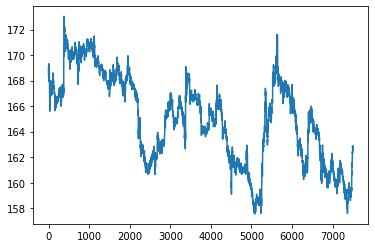

In [26]:
plt.plot(q['close'].values)
plt.show()

In [28]:
len(q)

7500

In [40]:
df,n = pd.read_pickle('./MinuteDataFromYahooCompanies/TATAMOTORS.pk')
print(df.head())

                       open    high     low   close    volume   timestamp  \
date                                                                        
2019-11-14 09:15:00  170.00  170.00  168.80  169.10       0.0  1573703100   
2019-11-14 09:16:00  169.10  169.35  168.55  168.55  320787.0  1573703160   
2019-11-14 09:17:00  168.60  168.70  168.10  168.40  302589.0  1573703220   
2019-11-14 09:18:00  168.35  169.00  168.35  168.90  168936.0  1573703280   
2019-11-14 09:19:00  168.90  169.20  168.85  169.10  227135.0  1573703340   

                          dates  
date                             
2019-11-14 09:15:00  2019-11-14  
2019-11-14 09:16:00  2019-11-14  
2019-11-14 09:17:00  2019-11-14  
2019-11-14 09:18:00  2019-11-14  
2019-11-14 09:19:00  2019-11-14  


In [49]:
temp_df = df.where(df['dates'] == df['dates'].values[600]).dropna()
temp_df.reset_index(drop=True,inplace=True)
m = np.linspace(0.001,len(temp_df)/1000,num=len(temp_df))
temp_df['min_no'] = m
print(temp_df.head(10))

     open    high     low   close    volume     timestamp       dates  min_no
0  169.20  170.90  169.20  170.70       0.0  1.573790e+09  2019-11-15   0.001
1  170.70  170.85  170.25  170.35  412136.0  1.573790e+09  2019-11-15   0.002
2  170.35  170.45  170.00  170.45  389550.0  1.573790e+09  2019-11-15   0.003
3  170.45  170.45  169.70  169.90  368818.0  1.573790e+09  2019-11-15   0.004
4  170.00  170.35  169.95  170.35  149799.0  1.573790e+09  2019-11-15   0.005
5  170.40  172.85  170.40  172.50  764371.0  1.573790e+09  2019-11-15   0.006
6  172.70  173.05  172.10  173.05  724129.0  1.573790e+09  2019-11-15   0.007
7  173.10  173.35  172.65  172.75  472608.0  1.573790e+09  2019-11-15   0.008
8  172.70  172.75  172.30  172.40  397545.0  1.573790e+09  2019-11-15   0.009
9  172.50  172.50  172.05  172.20  237023.0  1.573790e+09  2019-11-15   0.010


In [50]:
cols = ['min_no','close']

In [61]:
val = temp_df.loc[:,cols].values
row = 100
maxlen=30
mms = preprocessing.MinMaxScaler()

In [66]:
t_x = val[row-maxlen:row,:][::-1]
t_x0 = t_x[:,0]
t_x1 = mms.fit_transform(t_x)[:,1]
c = list(zip(t_x0,t_x1))
for i in range(len(c)):
    print(c[i])

(0.1, 0.3571428571428896)
(0.099, 0.4285714285714164)
(0.098, 0.5)
(0.097, 0.5)
(0.096, 0.3571428571428896)
(0.095, 0.6428571428571388)
(0.094, 0.7857142857142776)
(0.093, 0.8571428571428896)
(0.092, 0.6428571428571388)
(0.091, 0.2857142857142776)
(0.09, 0.1428571428571388)
(0.089, 0.4285714285714164)
(0.08800000000000001, 0.07142857142855519)
(0.08700000000000001, 0.0)
(0.08600000000000001, 0.1428571428571388)
(0.085, 0.3571428571428896)
(0.084, 0.0)
(0.083, 0.7857142857142776)
(0.082, 0.6428571428571388)
(0.081, 0.4285714285714164)
(0.08, 0.6428571428571388)
(0.079, 0.5714285714285552)
(0.078, 0.6428571428571388)
(0.077, 0.4285714285714164)
(0.076, 0.5)
(0.075, 0.5714285714285552)
(0.074, 0.5714285714285552)
(0.07300000000000001, 0.7142857142857508)
(0.07200000000000001, 0.7142857142857508)
(0.07100000000000001, 1.0)
